## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
application_df.NAME.value_counts()

PARENT BOOSTER USA INC                                  1260
TOPS CLUB INC                                            765
UNITED STATES BOWLING CONGRESS INC                       700
WASHINGTON STATE UNIVERSITY                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC          408
                                                        ... 
TURKISH SOCIETY OF TEXAS                                   1
MISSOURI FARMLAND PRESERVATION TR                          1
SYLACAUGA ALLIANCE FOR FAMILY ENHANCEMENT INC - SAFE       1
HANDS THAT HEAL OF KANSAS INC                              1
IHWN INC                                                   1
Name: NAME, Length: 19568, dtype: int64

In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
trimmed_df=application_df.drop(columns=['EIN'])
trimmed_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Generate our categorical variable lists
#feature_cat = trimmed_df.dtypes[trimmed_df.dtypes == "object"].index.tolist()

In [5]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE

#trimmed_df[feature_cat].nunique()
trimmed_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [6]:
name_counts = trimmed_df['NAME'].value_counts()
name_counts

PARENT BOOSTER USA INC                                  1260
TOPS CLUB INC                                            765
UNITED STATES BOWLING CONGRESS INC                       700
WASHINGTON STATE UNIVERSITY                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC          408
                                                        ... 
TURKISH SOCIETY OF TEXAS                                   1
MISSOURI FARMLAND PRESERVATION TR                          1
SYLACAUGA ALLIANCE FOR FAMILY ENHANCEMENT INC - SAFE       1
HANDS THAT HEAL OF KANSAS INC                              1
IHWN INC                                                   1
Name: NAME, Length: 19568, dtype: int64

(0.0, 20.0)

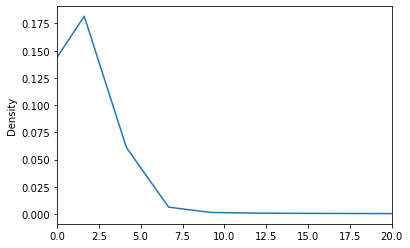

In [7]:
import matplotlib.pyplot as plt
name_counts.plot.density()
plt.xlim(left=0,right=20)

In [8]:
name_to_replace = list(name_counts[name_counts<6].index)
name_to_replace

['VETERANS OF FOREIGN WARS OF THE US DEPT OF TEXAS AUXILIARY',
 'SIGMA NU FRATERNITY',
 'HARMONY INC',
 'ARROW CHILD AND FAMILY MINISTRIES',
 'JAMESTOWN SOCIETY',
 'PENN STATE ALUMNI ASSOCIATION',
 'VETERANS OF FOREIGN WARS OF THE UNITED STATES DEPT OF COLORADO',
 'INTERNATIONL TRANSPLANT NURSES SOCIETY',
 'LEAGUE OF UNITED LATIN AMERICAN CITIZENS',
 'FATHER FLANAGANS BOYS HOME',
 'NATIONAL ASSOCIATION OF COMPOSERS USA',
 'CHC COMMUNITY CARE LLC',
 'RURITAN NATIONAL CORP',
 'DEPARTMENT OF NEVADA VETERANS OF FOREIGN WARS OF THE US INC',
 'NATIONAL ORGANIZATION FOR WOMEN INC',
 'PTA HAWAII CONGRESS',
 'WARRIOR BROTHERHOOD OF VETERANS MOTORCYCLE CLUB INC',
 'FLORIDA FAMILY CHILD CARE HOME ASSOCIATION INC',
 'KAPPA ALPHA PSI FRATERNITY',
 'SOCIETY OF PLASTICS ENGINEERS',
 'SOCIETY FOR MANAGEMENT INFORMATION SYSTEMS',
 'INTERNATIONAL ORDER OF THE RAINBOW GIRLS THE SUPREME ASSEMBLY',
 'UNITED ASSOCIATION OF JOURNEYMEN & APPRENTICES OF THE PLUMBING & PIPE',
 'NATIONAL HUGUENOT SOCIETY',
 'PTA

In [9]:
# Replace in dataframe
for names in name_to_replace:
    trimmed_df['NAME'] = trimmed_df['NAME'].replace(names,"Other")

# Check to make sure binning was successful
trimmed_df['NAME'].value_counts()

Other                                            20043
PARENT BOOSTER USA INC                            1260
TOPS CLUB INC                                      765
UNITED STATES BOWLING CONGRESS INC                 700
WASHINGTON STATE UNIVERSITY                        492
                                                 ...  
QUAIL FEDERATION INC                                 6
PUBLIC RELATIONS COUNCIL OF ALABAMA                  6
MONTANA CONGRESS OF PARENTS TEACHERS STUDENTS        6
NATIONAL CHARITY LEAGUE INC                          6
SOCIETY FOR CREATIVE ANACHRONISM                     6
Name: NAME, Length: 355, dtype: int64

In [10]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
app_counts = trimmed_df['APPLICATION_TYPE'].value_counts()
app_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE
application_types_to_replace = list(app_counts[app_counts<500].index)
application_types_to_replace

['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T15', 'T29', 'T17']

In [12]:
# Replace in dataframe
for app in application_types_to_replace:
    trimmed_df['APPLICATION_TYPE'] = trimmed_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
trimmed_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [13]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
binned_class_types = trimmed_df['CLASSIFICATION'].value_counts()
binned_class_types

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1370        1
C5200        1
C2150        1
C2190        1
C1728        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [14]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE
binned_class_types_trimmed= binned_class_types[binned_class_types>1]
binned_class_types_trimmed

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C2300       32
C7200       32
C1240       30
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
C1278       10
C1238       10
C1235        9
C1237        9
C7210        7
C4100        6
C2400        6
C1720        6
C1600        5
C1257        5
C2710        3
C0           3
C1260        3
C1256        2
C1267        2
C1234        2
C3200        2
C1246        2
Name: CLASSIFICATION, dtype: int64

In [15]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE
classifications_to_replace = list(binned_class_types[binned_class_types<500].index)
classifications_to_replace

['C1700',
 'C4000',
 'C5000',
 'C1270',
 'C2700',
 'C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C2300',
 'C7200',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C6000',
 'C1800',
 'C1250',
 'C8200',
 'C1278',
 'C1238',
 'C1235',
 'C1237',
 'C7210',
 'C4100',
 'C2400',
 'C1720',
 'C1600',
 'C1257',
 'C2710',
 'C0',
 'C1260',
 'C1256',
 'C1267',
 'C1234',
 'C3200',
 'C1246',
 'C6100',
 'C1580',
 'C1820',
 'C1283',
 'C2600',
 'C2170',
 'C2380',
 'C2570',
 'C4120',
 'C4200',
 'C8210',
 'C4500',
 'C2500',
 'C1570',
 'C1732',
 'C3700',
 'C1236',
 'C1900',
 'C2561',
 'C1245',
 'C1248',
 'C1370',
 'C5200',
 'C2150',
 'C2190',
 'C1728']

In [16]:
# Replace in dataframe
for cls in classifications_to_replace:
    trimmed_df['CLASSIFICATION'] = trimmed_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
trimmed_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [17]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
# Convert categorical data to numeric with `pd.get_dummies`
trimmed_df = pd.get_dummies(trimmed_df,dtype=float)
trimmed_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<AxesSubplot:>

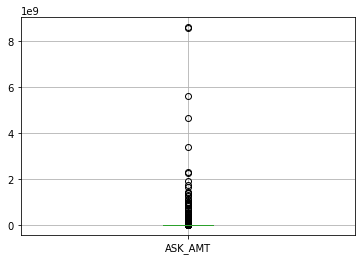

In [18]:
trimmed_df.boxplot(column="ASK_AMT")


In [19]:
ask_amt_trimmed= trimmed_df[trimmed_df["ASK_AMT"]<1000000]
ask_amt_trimmed


,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34293,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34294,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
X = ask_amt_trimmed.drop('IS_SUCCESSFUL', axis=1).values
y = ask_amt_trimmed['IS_SUCCESSFUL'].values

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [21]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [22]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE


In [23]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 14
hidden_nodes_layer2 = 12
hidden_nodes_layer3 = 10
hidden_nodes_layer4 = 8

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Forth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                5600      
                                                                 
 dense_1 (Dense)             (None, 12)                180       
                                                                 
 dense_2 (Dense)             (None, 10)                130       
                                                                 
 dense_3 (Dense)             (None, 8)                 88        
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 6,007
Trainable params: 6,007
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [25]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
767/767 [==============================] - 8s 7ms/step - loss: 0.5031 - accuracy: 0.7653
Epoch 2/50
767/767 [==============================] - 7s 9ms/step - loss: 0.4294 - accuracy: 0.7987
Epoch 3/50
767/767 [==============================] - 6s 8ms/step - loss: 0.4209 - accuracy: 0.8011
Epoch 4/50
767/767 [==============================] - 5s 7ms/step - loss: 0.4175 - accuracy: 0.8032
Epoch 5/50
767/767 [==============================] - 5s 7ms/step - loss: 0.4152 - accuracy: 0.8034
Epoch 6/50
767/767 [==============================] - 5s 7ms/step - loss: 0.4137 - accuracy: 0.8035
Epoch 7/50
767/767 [==============================] - 5s 6ms/step - loss: 0.4129 - accuracy: 0.8041
Epoch 8/50
767/767 [==============================] - 5s 7ms/step - loss: 0.4120 - accuracy: 0.8055
Epoch 9/50
767/767 [==============================] - 5s 7ms/step - loss: 0.4110 - accuracy: 0.8061
Epoch 10/50
767/767 [==============================] - 5s 7ms/step - loss: 0.4099 - accuracy: 0.8058

In [26]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

256/256 - 1s - loss: 0.4426 - accuracy: 0.8003 - 1s/epoch - 5ms/step
Loss: 0.44259727001190186, Accuracy: 0.8002688884735107


In [27]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE
nn.save('AlphabetSoupCharity_Optimization.h5')